In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import math
import random
import os

from official.vision.detection.dataloader import input_reader
from official.modeling.hyperparams import params_dict
from official.vision.detection.configs.maskrcnn_config import MASKRCNN_CFG

%load_ext autoreload
%autoreload 2

nb_train_imgs = 118287

tf.__version__

'2.4.1'

## Checking input data

In [2]:
batch_size = 64
training_file_pattern = '/training-data/coco/train-*'
MASKRCNN_CFG.override({
    'train': {
        'batch_size': batch_size
    }
}, is_strict=False)
train_input_fn = input_reader.InputFn(
        file_pattern=training_file_pattern,
        params=MASKRCNN_CFG,
        mode=input_reader.ModeKeys.TRAIN,
        batch_size=batch_size)
dataset = train_input_fn()

Instructions for updating:
Use fn_output_signature instead


epoch 0 batch 0


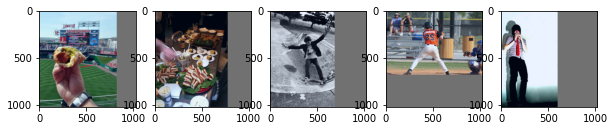

epoch 0 batch 1


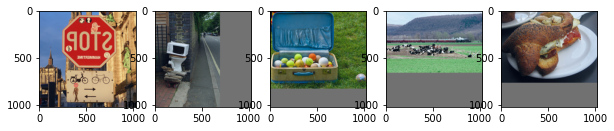

epoch 0 batch 2


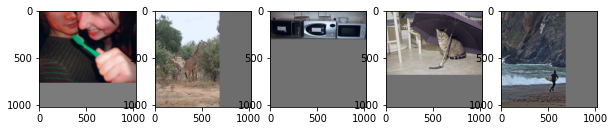

In [ ]:
!sudo rm -r /training-data/cache_temp/*
nb_imgs_per_batch_to_show = 5

batch_start_idx = 0
nb_batches = 3
epochs = range(3)

batch_idx_1st_ep = set(range(batch_start_idx, batch_start_idx+nb_batches))
batches_per_ep = nb_train_imgs//batch_size
batch_idx_to_show = set([b + ep*batches_per_ep for ep in epochs for b in batch_idx_1st_ep])
#batch_idx_to_show = set([b + shift + ep*batches_per_ep for ep in epochs for b in batch_idx_1st_ep for shift in [0, batches_per_ep/2]])

batch_idx=0
for data, _ in dataset.as_numpy_iterator():  # example is (image, label)
    images = data['image']
    if len(batch_idx_to_show) == 0:
        break
    if batch_idx in batch_idx_to_show:
        batch_idx_to_show.remove(batch_idx)
        print(f"epoch {batch_idx // batches_per_ep} batch {batch_idx%batches_per_ep}")

        fig, ax = plt.subplots(nrows=1, ncols=nb_imgs_per_batch_to_show, figsize=(2*nb_imgs_per_batch_to_show, 10))
        i=0
        for col in ax: # iterate over batch elem
            image = images[i].astype(np.float32)
            #print(label.numpy()[i,0])
            image = (image+abs(np.min(image)))/(np.max(image)-np.min(image))
            col.imshow(np.squeeze(image))
            i+=1
        plt.show()
    else:
        print(f"batch {batch_idx}/{batches_per_ep}", end="\r")

    batch_idx+=1

In [50]:
train_iterator = dataset.as_numpy_iterator()


In [51]:
next(train_iterator)[0]['image'].shape

(5, 1024, 1024, 3)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


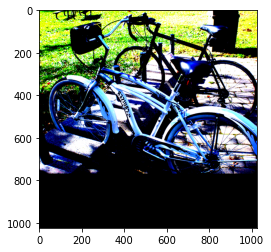

In [45]:
img = next(train_iterator)[0]['image'][0]
img = img.astype(np.float32)
plt.imshow(img)
plt.show()